In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Simple Regression
Hanya ada 1 x dan y
Data nya harus berbentuk linier

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data1 = data[['TV','Sales']]
data1.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


Text(0, 0.5, 'Sales')

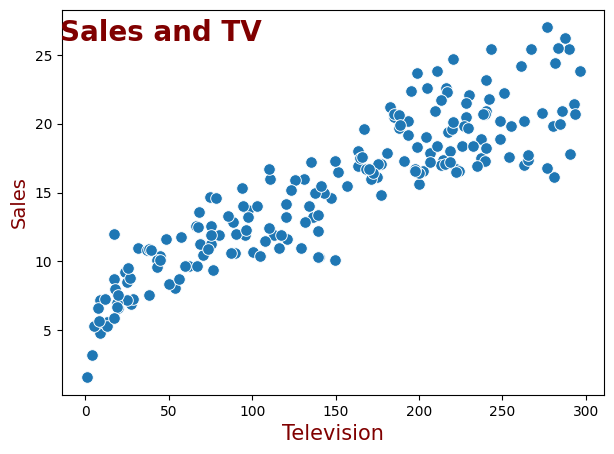

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(x='TV', y='Sales', data=data1, s=70)

title = 'Sales and TV'
ax.text(45,26,title,horizontalalignment='center',color='#800000',fontsize=20,fontweight='bold')

ax.set_xlabel('Television', fontsize=15, color='#800000')
ax.set_ylabel('Sales', fontsize=14, color='#800000')

In [7]:
data1.columns = ['x','y']
data1.head()
# x (Sales) dan y (TV)

,x,y
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


## Simple Linear Regression from Scracth

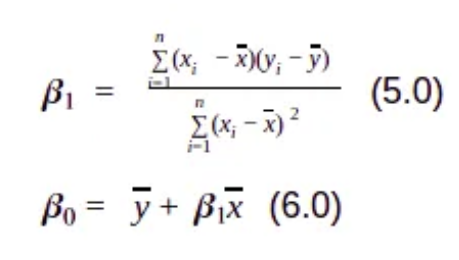

Sumber : https://medium.datadriveninvestor.com/linear-regression-35f8a65d83b9

In [8]:
data1['(x-x_mean)'] = round(data1['x'] - data1['x'].mean(),2)
data1['(y-y_mean)'] = round(data1['y'] - data1['y'].mean(),2)
data1['(x-x_mean)(y-y_mean)'] = data1['(x-x_mean)'] * data1['(y-y_mean)']
data1['pow((x-x_mean),2)'] = round(pow(data1['x'] - data1['x'].mean(),2),2)
data1.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)"
0,230.1,22.1,83.06,6.97,578.9282,6898.55
1,44.5,10.4,-102.54,-4.73,485.0142,10514.96
2,17.2,12.0,-129.84,-3.13,406.3992,16859.07
3,151.5,16.5,4.46,1.37,6.1102,19.87
4,180.8,17.9,33.76,2.77,93.5152,1139.57


In [9]:
b1 = data1['(x-x_mean)(y-y_mean)'].sum() / data1['pow((x-x_mean),2)'].sum()
b1
# Slope

0.05546477399589617

In [10]:
b0 = data1['y'].mean() - b1 * data1['x'].mean()
b0

6.974820969708439

In [11]:
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
textstr

'y = 6.974820969708439 + 0.05546477399589617 * x'

In [12]:
data1['y_pred'] = b0 + b1*data1['x']
data1.head()

,x,y,(x-x_mean),(y-y_mean),(x-x_mean)(y-y_mean),"pow((x-x_mean),2)",y_pred
0,230.1,22.1,83.06,6.97,578.9282,6898.55,19.737265
1,44.5,10.4,-102.54,-4.73,485.0142,10514.96,9.443003
2,17.2,12.0,-129.84,-3.13,406.3992,16859.07,7.928815
3,151.5,16.5,4.46,1.37,6.1102,19.87,15.377734
4,180.8,17.9,33.76,2.77,93.5152,1139.57,17.002852


## Simple Linear Regression with sklearn

In [13]:
from sklearn.linear_model import LinearRegression

x = data1.x.values.reshape(-1,1)
y = data1.y.values.reshape(-1,1)

model = LinearRegression().fit(x, y)

b0 = float(model.intercept_[0])
b0 = round(b0,3)
b1 = float(model.coef_[0][0])
b1 = round(b1,3)
print('intercept (b0 ): ', b0)
print('slope (b1) : ', b1)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * x'
print(textstr)

intercept (b0 ):  6.975
slope (b1) :  0.055
 
y = 6.975 + 0.055 * x


Text(0, 0.5, 'Sales')

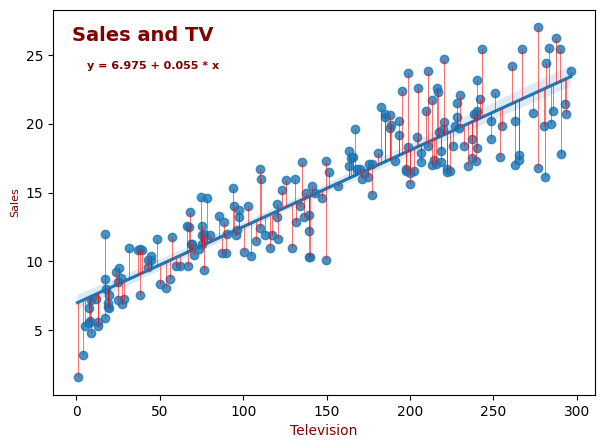

In [14]:
fit = np.polyfit(data1['x'], data1['y'], deg=1)
y_hat = fit[1] + data1['x'] * fit[0]

fig, ax = plt.subplots(figsize=(7,5))
sns.regplot(x='x', y='y', data=data1)
plt.vlines(data1['x'], y_hat, data1['y'], lw = .4, colors='r');

title = 'Sales and TV'
ax.text(40,26,title,horizontalalignment='center',color='#800000',fontsize=14,fontweight='bold')
ax.text(46,24,textstr,horizontalalignment='center',color='#800000',fontsize=8,fontweight='bold')
ax.set_xlabel('Television', fontsize=10, color='#800000')
ax.set_ylabel('Sales', fontsize=8, color='#800000')

## Multiple Linear Regression

In [15]:
data2 = data[['TV','Radio','Sales']]
data2.head()

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,12.0
3,151.5,41.3,16.5
4,180.8,10.8,17.9


In [16]:
x = data2[['TV','Radio']]
y = data2['Sales']

model = LinearRegression().fit(x, y)

In [17]:
b0 = round(float(model.intercept_),3)
b1 = round(float(model.coef_[0]),3)
b2 = round(float(model.coef_[1]),3)
print('intercept (b0) : ', b0)
print('slope (b1)      : ', b1)
print('slope (b2)      : ', b2)
print(' ')
textstr = 'y = '+str(b0)+' + '+str(b1)+' * TV  + '+str(b2)+' * Radio'
print(textstr)

intercept (b0) :  4.631
slope (b1)      :  0.054
slope (b2)      :  0.107
 
y = 4.631 + 0.054 * TV  + 0.107 * Radio


In [18]:
y[0:3]
# nilai y aktual

0    22.1
1    10.4
2    12.0
Name: Sales, dtype: float64

In [19]:
y_pred = model.predict(x)
y_pred[0:3]
# nilai y prediksi

array([21.21078412, 11.26581887, 10.48671441])

In [20]:
from sklearn.metrics import mean_squared_error
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_pred,y))))
# Mencari RMSE

RMSE for testing data is 1.6450083823140502


In [21]:
from sklearn.metrics import r2_score
print('R-squared for training data is {}'.format(r2_score(y_pred,y)))
# Mencari R - squared

R-squared for training data is 0.892076776218518


In [22]:
from sklearn.metrics import mean_absolute_error
print('MAE for training data is {}'.format(mean_absolute_error(y_pred,y)))
# Mencari MAE

MAE for training data is 1.2367636706717362


estimasi error +- 1.2

In [23]:
data2.describe()

,TV,Radio,Sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,15.130500
std,85.854236,14.846809,5.283892
min,0.700000,0.000000,1.600000
25%,74.375000,9.975000,11.000000
50%,149.750000,22.900000,16.000000
75%,218.825000,36.525000,19.050000
max,296.400000,49.600000,27.000000


prediksi sales 15 -> 13.8 atau 16.2